### 目标检测

In [1]:
# 训练
!python tools/train.py data/rtmdet_tiny_ear.py

In [3]:
# 测试
!python tools/test.py data/rtmdet_tiny_ear.py work_dirs/rtmdet_tiny_ear/epoch_200.pth

None



```json
{"coco/bbox_mAP": 0.766, "coco/bbox_mAP_50": 0.96, "coco/bbox_mAP_75": 0.949, "coco/bbox_mAP_s": -1.0, "coco/bbox_mAP_m": -1.0, "coco/bbox_mAP_l": 0.766, "data_time": 0.44484012777155096, "time": 0.48944252187555487}
```

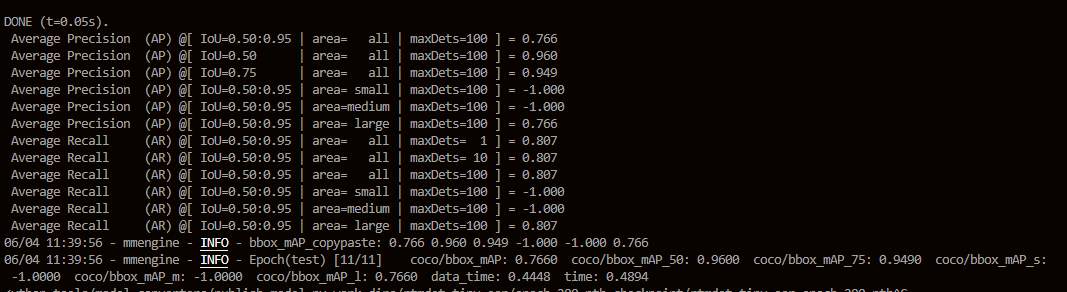

In [ ]:
# 模型简化
!python tools/model_converters/publish_model.py work_dirs/rtmdet_tiny_ear/epoch_200.pth checkpoint/rtmdet_tiny_ear_epoch_200.pth

In [ ]:
# 推理
!python demo/image_demo.py \
        data/test_ear/ear1.jpg \
        data/rtmdet_tiny_ear.py \
        --weights checkpoint/rtmdet_tiny_ear_epoch_200-e2d9a778.pth \
        --out-dir outputs/EAR1_rtmdet \
        --device cuda:0 \
        --pred-score-thr 0.3


![avatar](ear1.jpg)

### 关键点预测

In [ ]:
# 训练
!python tools/train.py data/rtmdet_tiny_ear.py
# !bash tools/dist_train.sh data/rtmpose-s-ear.py 8

In [ ]:
# 测试
!python tools/test.py data/rtmpose-s-ear.py work_dirs/rtmpose-s-ear/epoch_300.pth


```json
{"coco/AP": 0.7533277942600359, "coco/AP .5": 1.0, "coco/AP .75": 0.9497705868147791, "coco/AP (M)": -1.0, "coco/AP (L)": 0.7533277942600359, "coco/AR": 0.7785714285714286, "coco/AR .5": 1.0, "coco/AR .75": 0.9523809523809523, "coco/AR (M)": -1.0, "coco/AR (L)": 0.7785714285714286, "PCK": 0.9705215419501133, "AUC": 0.12369614512471656, "NME": 0.04106179494706411, "data_time": 1.4640614986419678, "time": 1.5181818008422852}
```

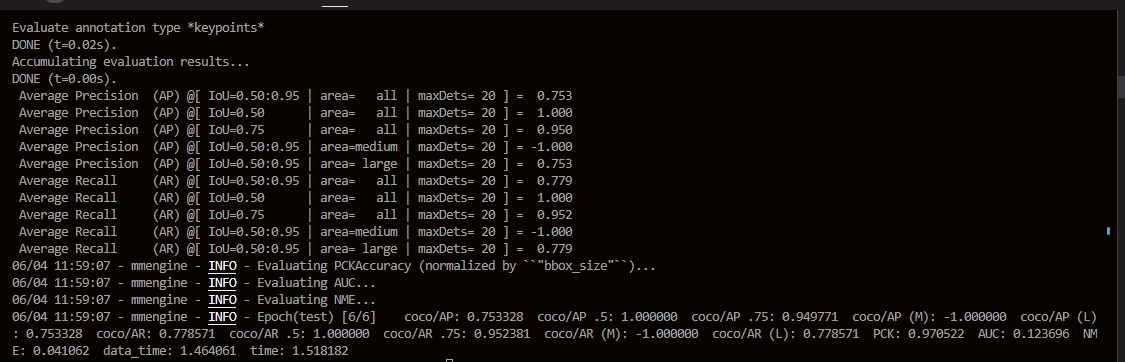

In [ ]:
# 模型简化
!python tools/misc/publish_model.py \
        work_dirs/rtmpose-s-ear/epoch_300.pth \
        checkpoint/rtmpose-s-ear-300.pth

In [ ]:

# 推理
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        data/rtmdet_tiny_ear.py \
        checkpoint/rtmdet_tiny_ear_epoch_200-e2d9a778.pth \
        data/rtmpose-s-ear.py \
        checkpoint/rtmpose-s-ear-300-8151ffb4_20230604.pth \
        --input data/test_ear/ear1.jpg \
        --output-root outputs/EAR1_RTMDet-RTMPose \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 10 \
        --thickness 10 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

# 多目标检测+关键点识别
!python demo/topdown_demo_with_mmdet.py \
        data/rtmdet_tiny_ear.py \
        checkpoint/rtmdet_tiny_ear_epoch_200-e2d9a778.pth \
        data/rtmpose-s-ear.py \
        checkpoint/rtmpose-s-ear-300-8151ffb4_20230604.pth \
        --input data/test_ear/ear5.jpg \
        --output-root outputs/EAR5_RTMDet-RTMPose \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 10 \
        --thickness 10 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

![avatar](ear1_POSE.jpg)